<a href="https://colab.research.google.com/github/juggy12/Intro-to-Colab/blob/main/first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [27]:
torch.manual_seed(32)
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [30]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [31]:
my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}, inplace=True)
my_df

<ipython-input-31-a6402098f6b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}, inplace=True)
<ipython-input-31-a6402098f6b4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'].replace({'Setosa': 0, 'Versicolor'

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
x = my_df.drop('variety', axis = 1).values
y = my_df['variety'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=32)

In [35]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [36]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [38]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1699321269989014
Epoch: 10 Loss: 0.9570867419242859
Epoch: 20 Loss: 0.7980871796607971
Epoch: 30 Loss: 0.6327950358390808
Epoch: 40 Loss: 0.43861737847328186
Epoch: 50 Loss: 0.2904532253742218
Epoch: 60 Loss: 0.1778070330619812
Epoch: 70 Loss: 0.11584122478961945
Epoch: 80 Loss: 0.0893637090921402
Epoch: 90 Loss: 0.077529177069664


Text(0.5, 0, 'Epoch')

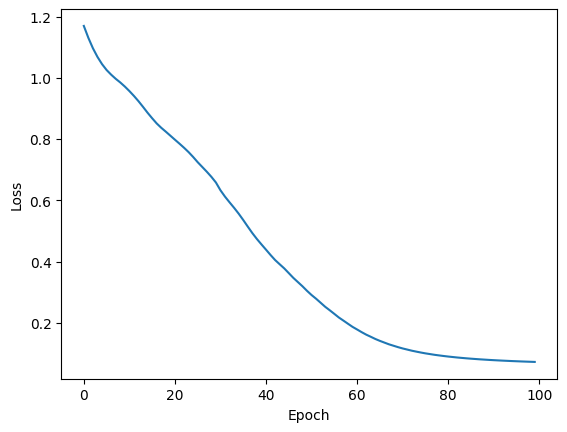

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [40]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.0538)

In [41]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} \t {y_test[i]} {y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct!')

1. tensor([-3.3646,  3.9392,  0.3720]) 	 1 1
2. tensor([  7.5572,   1.1015, -11.3347]) 	 0 0
3. tensor([  6.5956,   1.5027, -10.4091]) 	 0 0
4. tensor([-3.3331,  4.2594,  0.0623]) 	 1 1
5. tensor([-7.3782,  2.8087,  5.1605]) 	 2 2
6. tensor([-7.3760,  3.9013,  4.2826]) 	 2 2
7. tensor([  6.1971,   1.6470, -10.0047]) 	 0 0
8. tensor([  6.6383,   1.4348, -10.4031]) 	 0 0
9. tensor([-2.6753,  4.3091, -0.6392]) 	 1 1
10. tensor([  7.1875,   1.3812, -11.0965]) 	 0 0
11. tensor([-3.8318,  4.4027,  0.5246]) 	 1 1
12. tensor([-8.6807,  1.9994,  6.8923]) 	 2 2
13. tensor([-2.0678,  3.8200, -0.7571]) 	 1 1
14. tensor([-1.0768,  4.3741, -2.2838]) 	 1 1
15. tensor([-7.4965,  2.6207,  5.3287]) 	 2 2
16. tensor([-8.6136,  1.5508,  7.1186]) 	 2 2
17. tensor([-3.7761,  3.6462,  0.9487]) 	 1 1
18. tensor([-6.7608,  2.7754,  4.5281]) 	 2 2
19. tensor([-1.7048,  4.1980, -1.4670]) 	 1 1
20. tensor([  7.7757,   1.3740, -11.8864]) 	 0 0
21. tensor([  6.8811,   1.5887, -10.8763]) 	 0 0
22. tensor([-9.4350,  

In [42]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [43]:
with torch.no_grad():
  predicted_scores = model.forward(new_iris)
  flower_name = predicted_scores.argmax().item()
  if flower_name == 0:
    print('Setosa')
  elif flower_name == 1:
    print('Versicolor')
  else:
    print('Virginica')

Setosa


In [44]:
newer_iris = torch.tensor([5.4,1.0,8.2,9.3])

In [45]:
with torch.no_grad():
  predicted_scores = model.forward(newer_iris)
  flower_name = model.forward(newer_iris).argmax().item()
  if flower_name == 0:
    print('Setosa')
  elif flower_name == 1:
    print('Versicolor')
  else:
    print('Virginica')

Virginica


In [46]:
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [47]:
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<ipython-input-47-3a04575271d5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [48]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)